In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### `QUESTION 1` 

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Tesla and the ticker symbol is `TSLA`.


In [7]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named shopify_data. Set the period parameter to 'top' so we get information for the top amount of time.

In [8]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace = True)

Reset the index, save, and display the first five rows of the shopify_data dataframe using the head function. Take a screenshot of the results.

In [9]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


#### `QUESTION 2` 

# Tesla Revenue from website of companies MarketCap

Use the `requests` library to download the webpage [https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html`.


In [52]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [11]:
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.

In [49]:
soup = BeautifulSoup(html_data , parser='html5lib')

In [43]:
data_list = []
tbody = soup.find_all("tbody")
# Loop through each row in the HTML table
for row in tbody[1].find_all('tr'):
    col = row.find_all("td")
    # Create a dictionary for each row
    row_data = {
        "Date": col[0].text,
        "Revenue": col[1].text,
    }
    # Append the row dictionary to our data list
    data_list.append(row_data)
# Convert the list of dictionaries to a DataFrame
tesla_revenue = pd.DataFrame(data_list)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$', '', regex=True)
tesla_revenue.dropna()

In [44]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#### `QUESTION 3`

We will do the same thing as we did for Tesla

In [15]:
gamestop = yf.Ticker("GME")

In [16]:
gamestop_data = tesla.history(period="max")

In [17]:
gamestop_data.reset_index(inplace=True)

In [18]:
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


#### `QUESTION 4`

In [19]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [20]:
r2 = requests.get(url2)

In [21]:
html2 = r2.text

In [22]:
soup2 =BeautifulSoup(html2 , parser='html5lib')

In [23]:
data_list = []
tbody = soup2.find_all("tbody")

# Loop through each row in the HTML table
for row in tbody[1].find_all('tr'):
    col = row.find_all("td")
    # Create a dictionary for each row
    row_data = {
        "Date": col[0].text,
        "Revenue": col[1].text,
    }

    # Append the row dictionary to our data list
    data_list.append(row_data)
# Convert the list of dictionaries to a DataFrame
gamestop_revenue = pd.DataFrame(data_list)
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',|\$', '', regex=True)
gamestop_revenue.dropna()

In [24]:
gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


#### `QUESTION 5`

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [46]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

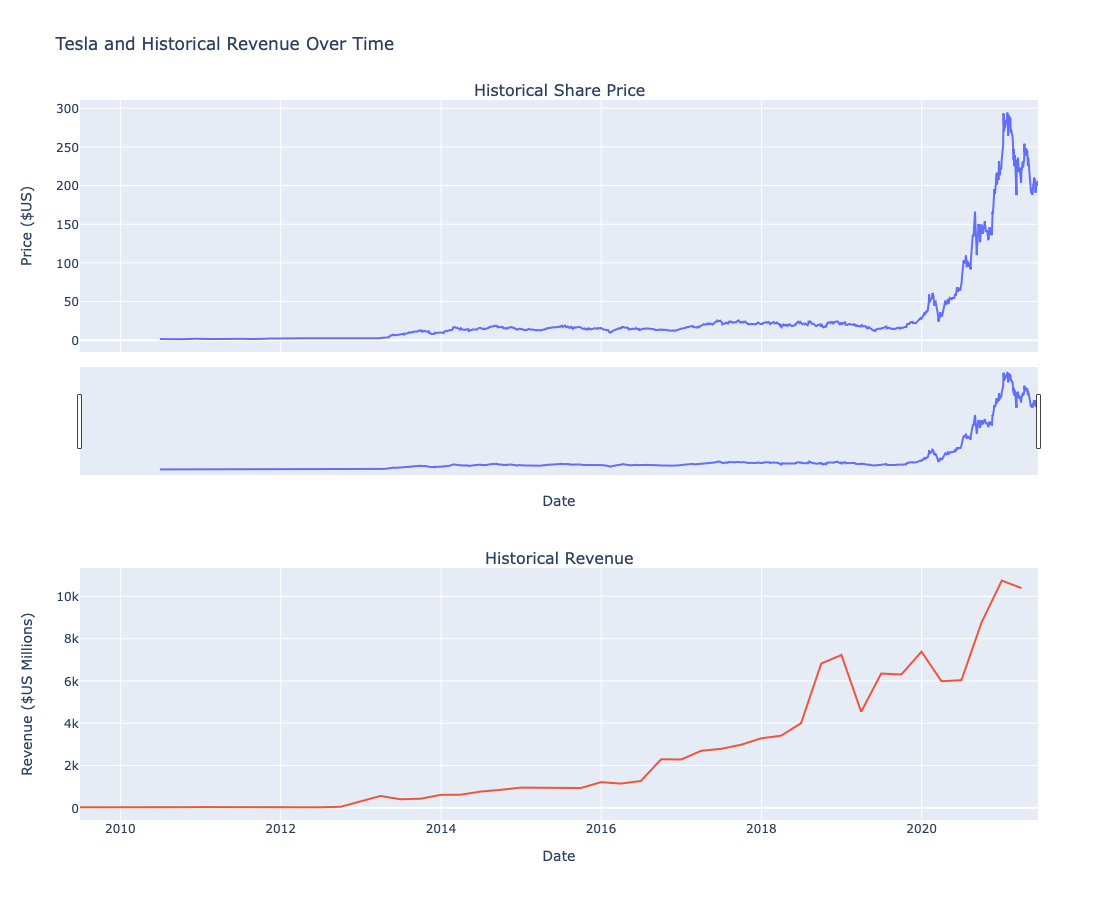

In [47]:
make_graph(tesla_data, tesla_revenue, 'Tesla and Historical Revenue Over Time')

#### `QUESTION 6`

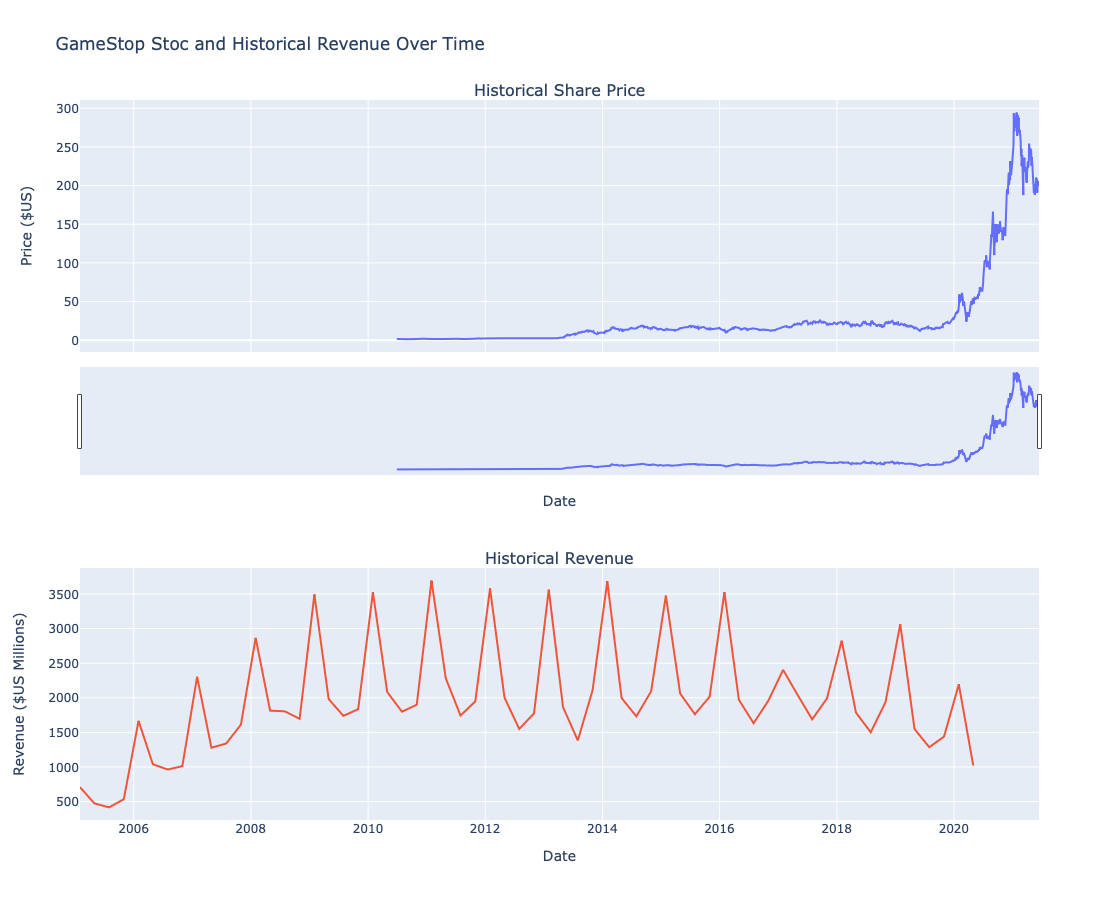

In [48]:
make_graph(gamestop_data, gamestop_revenue, 'GameStop Stoc and Historical Revenue Over Time')